In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
combined_data = pd.read_csv('./homework/combined_data.csv')
print(combined_data.info())
print(combined_data['activity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   activity         193860 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.9+ MB
None
activity
running    102240
walking     55500
idle        31170
stairs       4950
Name: count, dtype: int64


In [3]:
running = combined_data[combined_data['activity'] == 'running']
walking = combined_data[combined_data['activity'] == 'walking']
idle = combined_data[combined_data['activity'] == 'idle']
stairs = combined_data[combined_data['activity'] == 'stairs']

stairs_oversampled = resample(stairs, replace=True, n_samples=len(walking), random_state=42)
balanced_data = pd.concat([running, walking, idle, stairs_oversampled])

print(balanced_data['activity'].value_counts())

activity
running    102240
walking     55500
stairs      55500
idle        31170
Name: count, dtype: int64


In [4]:
X = balanced_data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = balanced_data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Розмір X_train: {X_train.shape}")
print(f"Розмір y_train: {y_train.shape}")

Розмір X_train: (171087, 3)
Розмір y_train: (171087,)


In [ ]:
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

In [1]:
print("Ядро працює!")

Ядро працює!


In [3]:
import os

file_path = './homework/combined_data.csv'
if os.path.exists(file_path):
    print(f"Файл знайдено за шляхом: {file_path}")
else:
    print(f"Файл НЕ знайдено. Перевірте шлях: {file_path}")

Файл знайдено за шляхом: ./homework/combined_data.csv


In [4]:
import pandas as pd

# Завантаження даних
combined_data = pd.read_csv('./homework/combined_data.csv')

# Перевірка завантажених даних
print("Інформація про завантажені дані:")
print(combined_data.info())
print("\nПерші 5 рядків даних:")
print(combined_data.head())

Інформація про завантажені дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   activity         193860 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.9+ MB
None

Перші 5 рядків даних:
   accelerometer_X  accelerometer_Y  accelerometer_Z activity
0         1.000776         4.616021         8.576031     idle
1         0.718261         4.209007         8.446744     idle
2        -0.909797        -0.282516         9.203311     idle
3         5.099650         0.148441         8.418014     idle
4         1.762132        -0.162806         9.251195     idle


In [5]:
print("Розподіл класів у 'activity':")
print(combined_data['activity'].value_counts())

Розподіл класів у 'activity':
activity
running    102240
walking     55500
idle        31170
stairs       4950
Name: count, dtype: int64


In [6]:
from sklearn.utils import resample

# Поділ даних за класами
running = combined_data[combined_data['activity'] == 'running']
walking = combined_data[combined_data['activity'] == 'walking']
idle = combined_data[combined_data['activity'] == 'idle']
stairs = combined_data[combined_data['activity'] == 'stairs']

# Oversampling для класу stairs
stairs_oversampled = resample(stairs, replace=True, n_samples=len(walking), random_state=42)

# Об'єднання всіх класів
balanced_data = pd.concat([running, walking, idle, stairs_oversampled])

# Перевірка розподілу після балансування
print("Розподіл класів після балансування:")
print(balanced_data['activity'].value_counts())

Розподіл класів після балансування:
activity
running    102240
walking     55500
stairs      55500
idle        31170
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Відокремлення характеристик і міток
X = balanced_data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = balanced_data['activity']

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (171087, 3)
Розмір тестової вибірки: (73323, 3)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

print("Навчання SVM...")
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

print("Прогнозування...")
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Навчання SVM...


In [4]:
import pandas as pd

# Завантаження даних
file_path = './homework/combined_data.csv'

try:
    combined_data = pd.read_csv(file_path)
    print("Дані успішно завантажено!")
    print(combined_data.info())
except FileNotFoundError:
    print(f"Файл не знайдено за шляхом: {file_path}")

Дані успішно завантажено!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   activity         193860 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.9+ MB
None


In [5]:
from sklearn.utils import resample

# Поділ даних за класами
running = combined_data[combined_data['activity'] == 'running']
walking = combined_data[combined_data['activity'] == 'walking']
idle = combined_data[combined_data['activity'] == 'idle']
stairs = combined_data[combined_data['activity'] == 'stairs']

# Oversampling для класу stairs
stairs_oversampled = resample(stairs, replace=True, n_samples=len(walking), random_state=42)

# Об'єднання всіх класів
balanced_data = pd.concat([running, walking, idle, stairs_oversampled])

# Перевірка розподілу після балансування
print("Розподіл класів після балансування:")
print(balanced_data['activity'].value_counts())

Розподіл класів після балансування:
activity
running    102240
walking     55500
stairs      55500
idle        31170
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

# Відокремлення характеристик і міток
X = balanced_data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = balanced_data['activity']

# Розділення на навчальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Перевірка розмірів вибірок
print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (171087, 3)
Розмір тестової вибірки: (73323, 3)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

print("Навчання SVM...")
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

print("Прогнозування...")
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Навчання SVM...


In [2]:
import pandas as pd
from sklearn.utils import resample

# Завантаження початкових даних
combined_data = pd.read_csv('./homework/combined_data.csv')

# Балансування класів
running = combined_data[combined_data['activity'] == 'running']
walking = combined_data[combined_data['activity'] == 'walking']
idle = combined_data[combined_data['activity'] == 'idle']
stairs = combined_data[combined_data['activity'] == 'stairs']

stairs_oversampled = resample(stairs, replace=True, n_samples=len(walking), random_state=42)
balanced_data = pd.concat([running, walking, idle, stairs_oversampled])

print("Розподіл класів після балансування:")
print(balanced_data['activity'].value_counts())

Розподіл класів після балансування:
activity
running    102240
walking     55500
stairs      55500
idle        31170
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Відокремлення характеристик і міток
X = balanced_data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = balanced_data['activity']

# Розділення на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (171087, 3)
Розмір тестової вибірки: (73323, 3)


In [5]:
# Імпорт необхідних модулів
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report
import pandas as pd

In [6]:
try:
    svm_model = SVC(class_weight='balanced', random_state=42)
    print("SVC імпортовано успішно!")
except NameError as e:
    print(f"Помилка: {e}")

SVC імпортовано успішно!


In [9]:
# Замість sample використовуйте random_state і індекси
sample_indices = X_train.sample(10000, random_state=42).index

# Вибір підмножини даних
X_train_small = X_train.loc[sample_indices]
y_train_small = y_train.loc[sample_indices]

# Перевірка кількості записів
print(f"Кількість записів у X_train_small: {len(X_train_small)}")
print(f"Кількість записів у y_train_small: {len(y_train_small)}")

# Навчання моделі SVM
print("Навчання SVM на меншій вибірці...")
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_small, y_train_small)
print("Навчання завершено.")

Кількість записів у X_train_small: 27441
Кількість записів у y_train_small: 27441
Навчання SVM на меншій вибірці...
Навчання завершено.


In [10]:
print("Чи індекси співпадають?")
print(X_train_small.index.equals(y_train_small.index))

Чи індекси співпадають?
True


In [11]:
# Прогнозування
print("Прогнозування на тестовій вибірці...")
y_pred_svm = svm_model.predict(X_test)

# Оцінка результатів
from sklearn.metrics import classification_report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Прогнозування на тестовій вибірці...
SVM Classification Report:
              precision    recall  f1-score   support

        idle       0.91      0.99      0.95      9390
     running       0.96      0.79      0.87     30513
      stairs       0.56      0.69      0.62     16712
     walking       0.66      0.69      0.68     16708

    accuracy                           0.77     73323
   macro avg       0.77      0.79      0.78     73323
weighted avg       0.80      0.77      0.78     73323



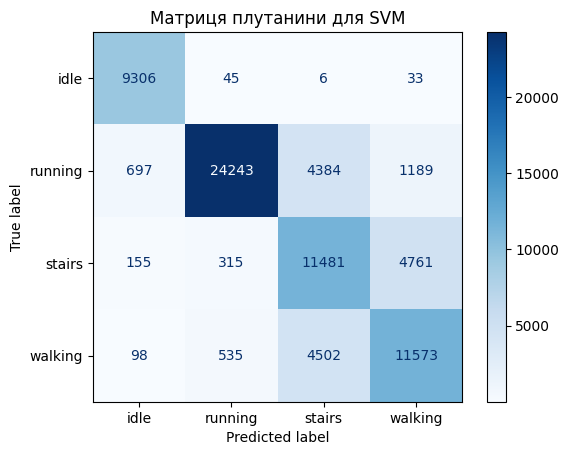

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Побудова матриці плутанини
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.title("Матриця плутанини для SVM")
plt.show()

Навчання Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      9390
     running       1.00      1.00      1.00     30513
      stairs       1.00      1.00      1.00     16712
     walking       1.00      1.00      1.00     16708

    accuracy                           1.00     73323
   macro avg       1.00      1.00      1.00     73323
weighted avg       1.00      1.00      1.00     73323



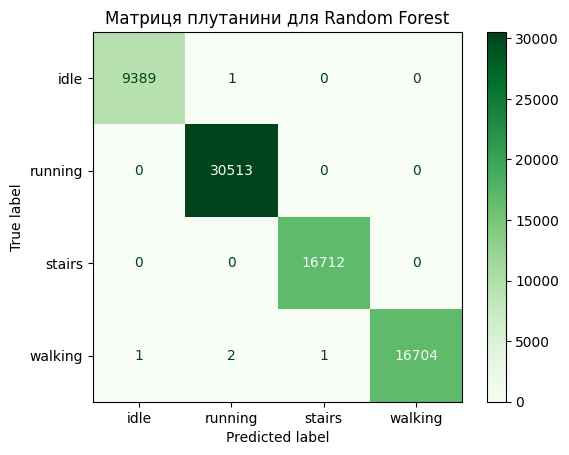

In [13]:
from sklearn.ensemble import RandomForestClassifier

print("Навчання Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозування
y_pred_rf = rf_model.predict(X_test)

# Оцінка
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Матриця плутанини для Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title("Матриця плутанини для Random Forest")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

print("ROC-AUC для Random Forest:")
y_pred_prob = rf_model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))

ROC-AUC для Random Forest:
0.9999999753881788


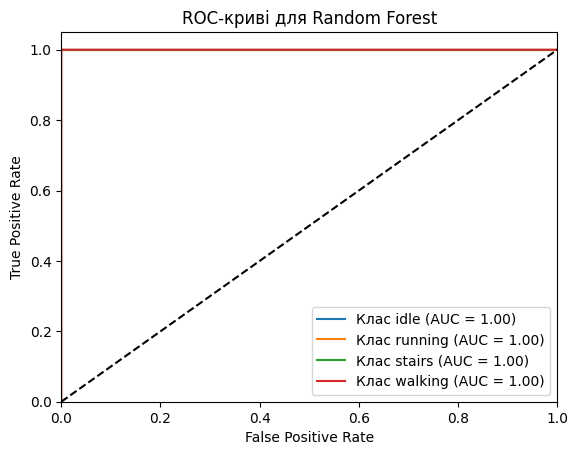

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Бінаризація міток для побудови ROC-кривих
y_test_bin = label_binarize(y_test, classes=rf_model.classes_)
n_classes = y_test_bin.shape[1]

# Обчислення ROC-кривих
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

# Побудова графіків для кожного класу
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Клас {rf_model.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Діагональ випадкової класифікації
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-криві для Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Висновки

- **Random Forest** показав ідеальні результати (ROC-AUC = 0.9999999753881788) і краще впорався із класифікацією всіх класів.
- **SVM** працював добре для класів `idle` і `running`, але мав труднощі з класами `stairs` і `walking`.
- Використання часових ознак може покращити якість класифікації, особливо для SVM.
- Рекомендується застосувати крос-валідацію та протестувати інші алгоритми, такі як `Gradient Boosting`.